## Introdution

For the past few months, I have been completing the Google Data Analytics Professional Certificate offered on Coursera. I have been learning about the six stages of the data analysis process (ask, prepare, process, analyze, share, & act), and how to use technical tools (SQL, Tableau, R) in each stage to ultimately gather insights from large amounts of data. To finish the course, Google recommends that each student creates their own Capstone Project to highlight the technical skills they learned during the course and to showcase their understanding of each step of the data analysis process. As such, I have completed my Capstone Project on the Cyclistic Case Study.

## About the company

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

By so-doing, I'm assuming the position of a Junior Data Analyst at this company.

## Problem

Cyclistic’s marketing strategy still relied on building general awareness and appealing to broad consumer segments.

## Ask

 To help complete this business task, I was assigned answer the following questions:
* How member and casual riders use Cyclistic bikes differently?
* Why would casual riders buy Cyclistic annual memberships?
* How can Cyclistic use digital media to influence casual riders to become members?

    
        


## Prepare

To answer this question I will be analysing historical Cyclistic bike trip data for 12 months from September 2021 to August 2022. The data is located Google Analytics Capstone case study and also available here on Kaggle https://www.kaggle.com/datasets/salamibrahim/cyclistic The data is organised in csv format. The data belongs to Cylistic and has been stored properly on its database. It's free of bias. It is credible. It is as well Reliable, Original, Comprehensive, Current and Cited. The license is being shown on the Google Analytics Case study. The data of the users is surely kept private and secure and as well made accessible to the company's team involved. All data is consistent. The data provides a good insight about the riders and members. We can derive useful insights out of it. There are some missing data which would be taken care of during the process stage.

## Process

 I will be using R. I'm choosing this because it makes me import the huge 12 CSV files easily, which was also time efficient.

The first step is installing necessary packages.

In [ ]:
#install packages
install.packages("tidyverse")
install.packages("skimr")
install.packages("janitor")
install.packages("dplyr")
install.packages("rmarkdown")

I went on to load the libraries.

In [ ]:
#load libraries
library("tidyverse")
library(lubridate)
library(hms)
library(data.table)
library(scales)
library(ggplot2)
rm(list=ls())

Loading all data

In [ ]:
sep_21 <- read_csv("C:/Users/JUDITH/Desktop/Cylicists/divvy-tripdata/202109-divvy-tripdata.csv")
spec(sep_21)
oct_21 <- read_csv("C:/Users/JUDITH/Desktop/Cylicists/divvy-tripdata/202110-divvy-tripdata.csv")
spec(oct_21)
nov_21 <- read_csv("C:/Users/JUDITH/Desktop/Cylicists/divvy-tripdata/202111-divvy-tripdata.csv")
dec_21 <- read_csv("C:/Users/JUDITH/Desktop/Cylicists/divvy-tripdata/202112-divvy-tripdata.csv")
jan_22 <- read_csv("C:/Users/JUDITH/Desktop/Cylicists/divvy-tripdata/202201-divvy-tripdata.csv")
feb_22 <- read_csv("C:/Users/JUDITH/Desktop/Cylicists/divvy-tripdata/202202-divvy-tripdata.csv")
mar_22 <- read_csv("C:/Users/JUDITH/Desktop/Cylicists/divvy-tripdata/202203-divvy-tripdata.csv")
apr_22 <- read_csv("C:/Users/JUDITH/Desktop/Cylicists/divvy-tripdata/202204-divvy-tripdata.csv")
may_22 <- read_csv("C:/Users/JUDITH/Desktop/Cylicists/divvy-tripdata/202205-divvy-tripdata.csv")
jun_22 <- read_csv("C:/Users/JUDITH/Desktop/Cylicists/divvy-tripdata/202206-divvy-tripdata.csv")
jul_22 <- read_csv("C:/Users/JUDITH/Desktop/Cylicists/divvy-tripdata/202207-divvy-tripdata.csv")
aug_22 <- read_csv("C:/Users/JUDITH/Desktop/Cylicists/divvy-tripdata/202208-divvy-tripdata.csv")

Here, I tried checking if the dataframes had same column names.

In [ ]:
compare_df_cols_same(sep_21, oct_21, nov_21, dec_21, jan_22, feb_22, mar_22, apr_22, may_22,
                    jun_22, jul_22, aug_22, verbose = TRUE)

In [ ]:
Since they matched, I combined dataframes into one dataframe.

In [ ]:
bike_rides <- rbind(sep_21, oct_21, nov_21, dec_21, jan_22, feb_22, mar_22, apr_22, may_22,
                    jun_22, jul_22, aug_22)

Changing the date formats

In [ ]:
bike_rides$started_at = strptime(bike_rides$started_at,"%Y-%m-%d %H:%M:%S")
bike_rides$ended_at = strptime(bike_rides$ended_at,"%Y-%m-%d %H:%M:%S")

Separating the dates and time, i.e putting them in different columns

In [ ]:
bike_rides$date <- as.Date(bike_rides$started_at)
bike_rides$month <- format(as.Date(bike_rides$date), "%m")
bike_rides$day <- format(as.Date(bike_rides$date), "%d")
bike_rides$year <- format(as.Date(bike_rides$date), "%Y")
bike_rides$day_of_week <- format(as.Date(bike_rides$date), "%A")

Calculating the length of each rides

In [ ]:
bike_rides$ride_length <- difftime(bike_rides$ended_at, bike_rides$started_at)

Removing negative ride lengths


In [ ]:
bike_rides <- bike_rides[!bike_rides$ride_length<0,] colnames(bike_rides)
str(bike_rides)
select(bike_rides, c('ride_length'))

Removing ride lengths that are more than 1,440 because a day = 1,440

In [ ]:
bike_rides <- bike_rides[!bike_rides$ride_length>1440,]

Getting rid of duplicates if there are

In [ ]:
bike_rides <- distinct(bike_rides)


For the final cleaning process, I got rid of missing data

In [ ]:
bike_rides <- bike_rides %>% select(ride_id, rideable_type, member_casual, date, month, day, year, day_of_week, ride_length)
drop_na(bike_rides)
str(bike_rides)

## Analyse

Summarising the data which allows me to see the Min, Median, Max and Average of the ride lengths

In [ ]:
summary(bike_rides$ride_length

Getting the total number of customers for each membership

In [ ]:
table(bike_rides$member_casual)

Total ride lengths for each customer type in minutes

In [ ]:

setNames(aggregate(ride_length ~ member_casual, bike_rides, sum), c("member_casual", "total_ride_length(mins)"))


Ride lengths based on customer type

In [ ]:
bike_rides %>% 
  group_by(member_casual) %>% 
  summarise(min_length = min(ride_length), max_length = max(ride_length), 
            median_length = median(ride_length), mean_length = mean(ride_length))


Ride lengths by day of week and customer type

In [ ]:

aggregate(bike_rides$ride_length ~ bike_rides$member_casual + bike_rides$day_of_week, FUN = mean)


Total number of ride lengths and averages by day of week and customer type

In [ ]:
bike_rides %>% 
  group_by(member_casual, day_of_week) %>% 
  summarise(total_rides = n(), avg_ride = mean(ride_length)) %>% 
  arrange(day_of_week)


Arranging the days of the week so they appear in order

In [ ]:
bike_rides$day_of_week <- ordered(bike_rides$day_of_week, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", 
                                                          "Friday", "Saturday", "Sunday"))

## Share

**Visualising with data findings**

Total ride lengths by day of week

In [ ]:
bike_rides %>%    
  group_by(member_casual, day_of_week) %>% 
  summarise(number_of_rides = n() ) %>% 
  arrange(member_casual, day_of_week) %>% 
  ggplot(aes(x = day_of_week, y = number_of_rides, fill = member_casual)) + geom_col(position = "dodge") + 
  labs(x= 'Day of Week', y='Total Number of Rides', title='Rides per Day of Week', fill = 'Type of Membership') +
  scale_y_continuous(breaks = c(250000, 400000, 550000), labels = c("250K", "400K", "550K"))


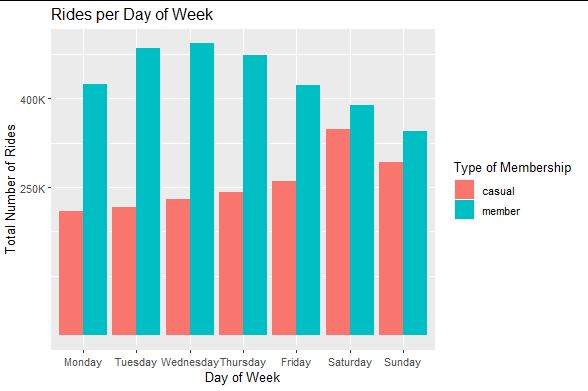

Total ride lengths by month

In [ ]:
bike_rides %>%   
  group_by(member_casual, month) %>%  
  summarise(total_rides = n(),`average_duration_(mins)` = mean(ride_length)) %>% 
  arrange(member_casual) %>% 
  ggplot(aes(x=month, y=total_rides, fill = member_casual)) + geom_col(position = "dodge") + 
  labs(x= "Month", y= "Total Number of Rides", title = "Rides per Month", fill = "Type of Membership") + 
  scale_y_continuous(breaks = c(100000, 200000, 300000, 400000), labels = c("100K", "200K", "300K", "400K")) + theme(axis.text.x = element_text(angle = 45))



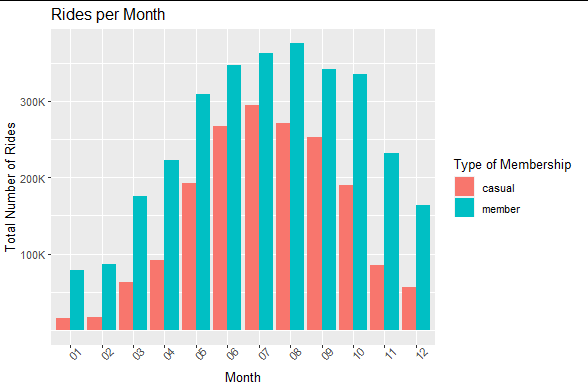

Where 01-12 signifies sep_21 to aug_22

Average ride length by customer type and month

In [ ]:

bike_rides %>%  
  group_by(member_casual, month) %>% 
  summarise(average_ride_length = mean(ride_length)) %>% 
  ggplot(aes(x=month, y = average_ride_length, fill = member_casual))+ 
  geom_col(position = "dodge") +
  labs (x="Month", y = "Average Ride Length(min)", title = "Average Ride Length by Customer Type and Month", 
        fill = "Type of Membership") + theme(axis.text.x = element_text(angle = 45))


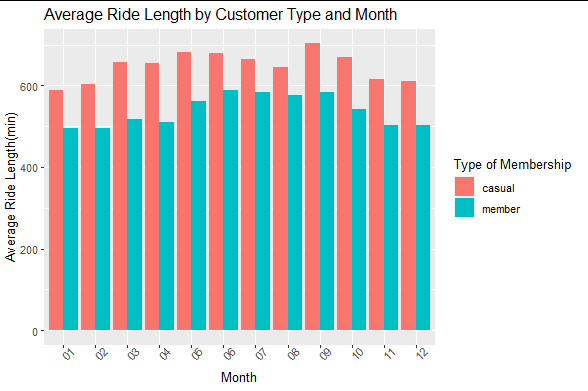

In [ ]:
bike_rides$month <- ordered(bike_rides$month, levels=c(sep_21, oct_21, nov_21, dec_21, jan_22, feb_22,  mar_22, apr_22, may_22, jun_22, jul_22, aug_22))

bike_rides$month <- ordered(bike_rides$month, levels=c("September", "October", "November", "December", "January", "February",  "March", "April","May", "June", "July", "August"))


Bike types rented

In [ ]:
bike_rides %>%    
  ggplot(aes(x = rideable_type, fill = member_casual)) + geom_bar(position = "dodge") + 
  labs(x= 'Bike Type', y='Number of Rentals', title='Bike Type Breakdown', fill = 'Type of Membership') +
  scale_y_continuous(breaks = c(500000, 1000000, 1500000), labels = c("500K", "1Mil", "1.5Mil"))


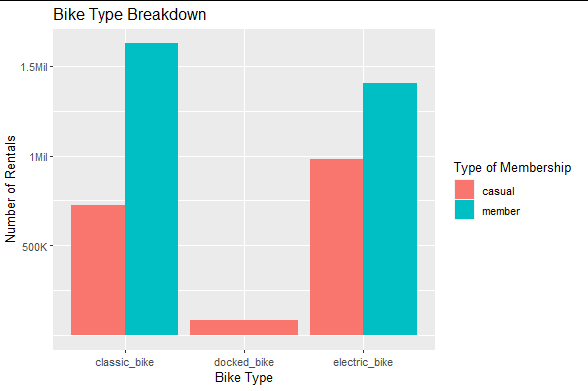

Demand over a 24 hour day

In [ ]:
bike_rides %>%     
  group_by(member_casual, time) %>% 
  summarise(total_rides = n()) %>% 
  ggplot(aes(x=time, y=total_rides, color = customer_type, group = member_casual)) +
  geom_line() + scale_x_datetime(date_breaks = "1 hour",
                                 date_labels = "%H:%M", expand = c(0,0)) +
  theme(axis.text.x = element_text(angle = 45)) +
  labs(title ="Demand Throughout the Day", x = "Time", y = "Total Rides")


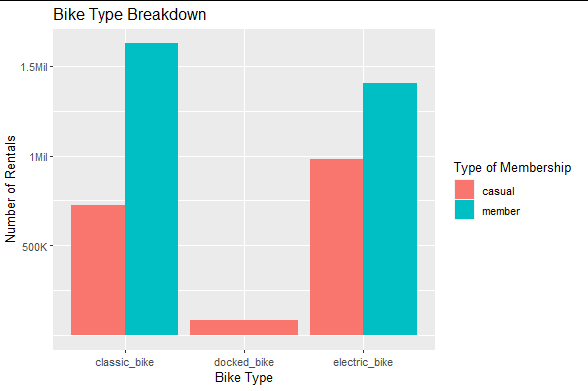

## Summary

Casual riders are lesser in number but their average ride length is longer.

The rides per day shows that casual riders use the bikes more during the weekend while members use it more during the week day. 
The rides by month shows that there are little to no casual riders during the winter months. On the other hand, casual riders use it during the summer months and s

The bike type breakdown shows snnual members mainly use classic bikes and rarely use docked bikes but casual riders don't mind riding all kinds of bikes.

The bike demand in a 24 hour span shows that usage by annual members peak during rush hour to indicate many use the bikes for commutes to and from work especially with the steep drop after the peak at 5pm. Casual riders are not as volatile as there is a steady increase throughout the day with a steady decrease after the peak at 5pm.

In general, we can assume casual riders use it more for leisure while annual members use it more for their daily activities no matter the period or conditon.

## Act

What should the company do with the findings?

Cyclistic can
create awareness and run promotions for annual memberships during the summer months because they seem to be the busiest and period with more riders in total. This opportunity can be used to attract new riders and convert existing casual riders to annual members.

They can as well host riding competitions and offer mouth watery prizes disounts for the annualm membership to those who participate as this will help attract customers and boost company profits. 